In [83]:
import time # explain in reference what each of these libraries are used for
import random
from math import *
import operator

import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing, model_selection

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [84]:
# load the training data from glass data set # explain about the dataset*
location = "glass.csv"
glass = pd.read_csv(location)
glass.sort_values ('Al', inplace=True)
glass.dtypes

Id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# Understanding the Dataset

The dataset 'glass.csv' is contains information on different glass records having varying levels of different elements such as Silion(Si) and Aluminium(Al). Each datapoint is classified into a type of glass ('type') which can take values of 1,2,3,5,6,7. Of these (1,2,3) are what we call 'Window Glass' and the rest fall under 'Household Glass'.

Lets create an additional column named 'OverallType' Where we classify each record under WindowGlass ('0') or HouseholdGlass ('1').

In [85]:
glass['OverallType'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,OverallType
21,22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
184,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
39,40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
38,39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
50,51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


# Binary classification

The ordinary logistic regression approach works for binary classes i.e. data that can be classified into one of two classes. Example : Student/ Non student, Yes/No.

In our data set, we have data about glass. The columns we see are indexes for amount of elements present in the glass. Example : Si means silicon, Na means sodium. Additionally there is also information about the glass type as 'type' column (Multi Class) and an OverallType of glass as 'OverallType' column (Binary class).

Since we will initially perform binary classification and for simple visualisation we will consider the 'OverallType' column as our target class variable (y) and only one of the elements, in this example 'Al' or Aluminium as our 'feature' or independent variable (x).





<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

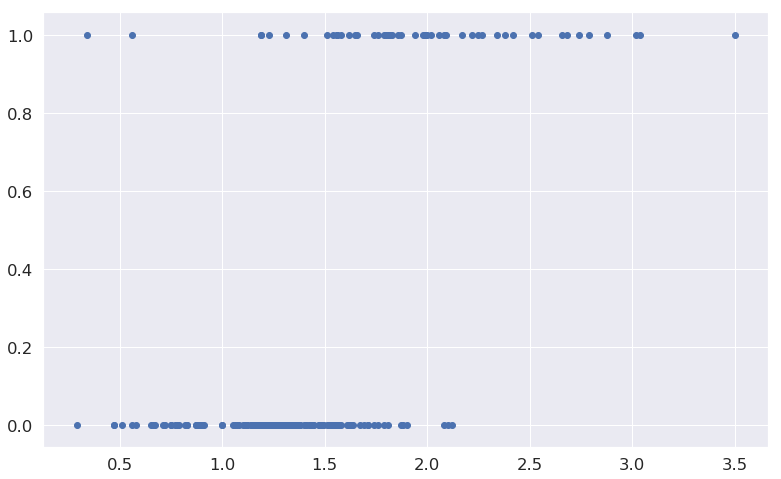

In [86]:
plt.figure(figsize = (13,8))
plt.scatter(glass.Al, glass.OverallType)
plt.plot

# Why not just use Linear Regression for this type of problem ? 

This is a natural question that can arise for someone that isnt familiar with categorical data and the method of Logistic Regression. So lets see what would happen if we used Linear Regression to deal with this problem.

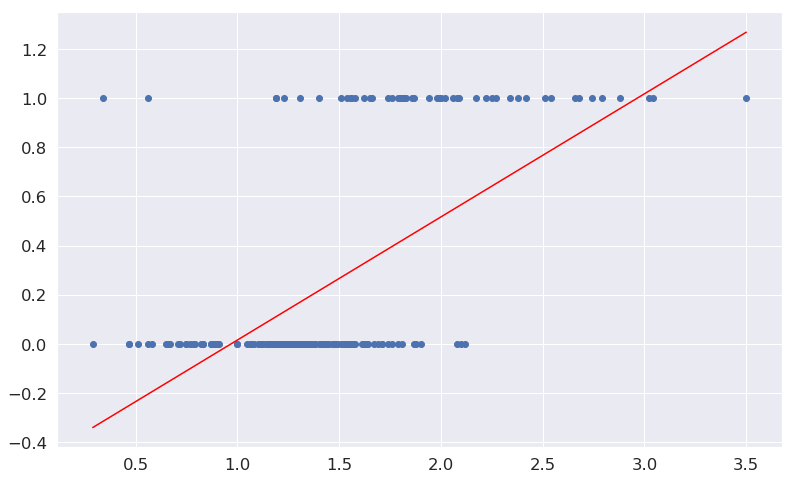

In [87]:
linreg = LinearRegression()
feature_col = ['Al']

X = glass[feature_col]
y = glass.OverallType
linreg.fit(X,y)
glass['OverallType_lin_pred'] = linreg.predict(X)

plt.figure(figsize=(13,8))
plt.plot(glass.Al, glass.OverallType_lin_pred, color = 'red')
plt.scatter(glass.Al, glass.OverallType)





Some of the first few problems we see with this approach are :

1. What class do we predict for values of AL between around 1.5 and 2 ? a value of 0.5 in Overall Glass Type doesnt really mean anything.
2. For AL values below 1 our class predictions are negative. Also for Al values above 3 the predicitons are more than 1. If the predictions are assumed to be probabilities we get some impossible values of probabilities which must be between 0 and 1.

Another problem with Linear Regression is it cannot deal with Multiclass problems. But we will touch on that a little later.




Lets see how this problem would be solved using Logistic Regression.

Logistic Regression could be understood as Linear Regression mapped using a function known as mapping function, which will help transform all predicted results to as close to a Binary realization. The function we will be using as mapping function is known as Sigmoid Function.

The below equation is what we get from Linear Regression. Training essentially involves us finding estimates for the various Beta coefficients:

#### 𝑦=𝛽0+𝛽1.𝑥1+𝛽2.𝑥2+𝛽3.𝑥3+...+𝛽𝑘.𝑥𝑘

What if we took whatever y we got from here and somehow transformed it using a function that gives us almost exclusively only 2 distinct values. Well that is essentially what our Sigmoid function does for us. Below is the mathematical form of the sigmoid function : 

#### P(probability) = [1/(1 + e^(-y)]

Here, the y is our result from linear regression itself !

As we will see a little ahead, the curve of the sigmoid function gives us values between 0 and 1 in a neat S-shaped curve. Hence its why it is treated as a probability( values between 0 and 1) and works excellently as a binary classifier as its output values are either extremely close to 0 or extremely close to 1.


Cross Entropy or the loss function in Logistic Regression is as shown below : 

#### log p(y|x) = - [log yˆ y (1−yˆ) 1−y = y log ˆy+ (1−y) log(1−yˆ)]

We define log odds as the log of the odds, wherein odds is the ratio of probability of a data point being a particular class with its probability of being of the other class. With a bit of work we get the equation as :

#### $odds = \frac{p}{1−p} = y = \beta_0 + \beta_1.x$
#### log odds = $log\frac{p}{1−p}$=log(P(y=1)/P(y=0))=β0+β1x1+…+βpxp 
#### = $\beta_0 + \beta_1.x$ for only 1 feature.

considering above case where we only have 1 feature wiz 'Al' our probability becomes 

$p = \frac{odds}{1 + odds}$ 






Anyways lets get that S-shaped curve that we spoke about regarding the Sigmoid function :







/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


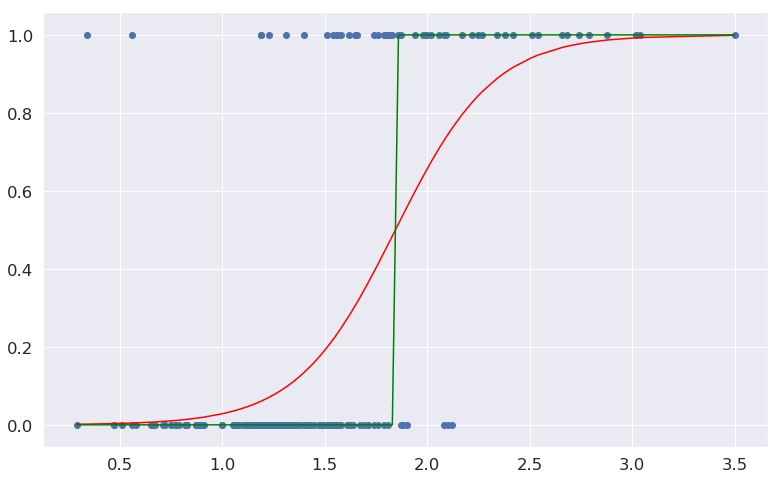

In [90]:

logreg = LogisticRegression(C= 10000) #regularization*

feature_cols = ['Al']

X = glass[feature_cols]
y = glass.OverallType

logreg.fit(X, y)

glass['OverallType_log_class_pred'] = logreg.predict(X)
glass['OverallType_log_prob_pred'] = logreg.predict_proba(X)[:, 1]

plt.figure(figsize=(13,8))
plt.scatter(glass.Al, glass.OverallType)
plt.plot(glass.Al, glass.OverallType_log_prob_pred, color ='red')
plt.plot(glass.Al, glass.OverallType_log_class_pred, color ='green')

The green curves in the above graph shows us which class the points have been classified into. The red points are the actual probabilities of the each data point. As we can see, by default at the probability of 0.5 the binary classification occurs.

# Interpretation of the Coefficient

As mentioned earlier, even in Logistic regression we have calculation of Beta coefficients as in Linear Regression. Lets try to understand that how the probabilities predicted change wrt change in values of the feature.



In [95]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2

print('log of odds for al = 2 = ', logodds)

log of odds for al = 2 =  [0.64697084]


Convert log of odds to odds

$ log(odds) = n $

$ odds = e^n $

In [96]:
odds = np.exp(logodds)
odds

array([1.90974714])

Convert odds to probability

$odds = e^n$

$\frac{p}{1 - p} = e^n$

$\frac{1 - p}{p} = \frac{1}{e^n}$

$\frac{1}{p} = 1+ \frac{1}{e^n}$

$\frac{1}{p} = \frac{1+ e^n}{e^n}$

$p = \frac{odds}{1 + odds}$

In [99]:
prob = odds/(1 + odds)
prob

array([0.65632753])

compute predicted probability for al=2 using the predict_proba method

In [100]:
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[2]])[:, 1]) #explain this indexing*

[[0.34367247 0.65632753]]
[0.65632753]


In [111]:
logreg.coef_

array([[4.17968425]])

examine the coefficient for al

In [101]:
for i in zip(feature_cols, logreg.coef_[0]): #explain '_' in code*
    print(i)

('Al', 4.179684246829908)


#### -->Interpretation: A 1 unit increase in 'al' is associated with a 4.17 unit increase in the log-odds of 'Overall Glass Type'.

increasing al by 1 (so that al=3) increases the log-odds

In [103]:
logodds = -0.10592543 + 2.0109909641729433

odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.8704637706698961

compute predicted probability for al=3 using the predict_proba method

In [104]:
logreg.predict_proba([[3]])

array([[0.00794958, 0.99205042]])

In [105]:
logreg.predict_proba([[2]])

array([[0.34367247, 0.65632753]])

we see that the probability of it being class '1' or increase in probability of it being glass type of 'household' increases from 0.65 to 0.99.


Positive coefficients increase the log-odds of the response 
(and thus increase the probability), 
and negative coefficients decrease the log-odds of the response 
(and thus decrease the probability)

In [107]:
logreg.intercept_

array([-7.71239765])

--> Interpretation: For an 'al' value of 0, the log-odds of 'household' is -7.71.

In [108]:
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.00044705])

As is expected, the probability of probability being 1 when Al = 0  is extremely low.

In [109]:
#other periodic table elements. model from these additional features.